In [14]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.filters import gaussian
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"
import time


from SwinIR_wrapper.SwinIR import SwinIR_SR

import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


pretrained_model = "real_sr x4" #@param ["real_sr x4", "classical_sr x2", "classical_sr x3", "classical_sr x4", "classical_sr x8", "lightweight x2", "lightweight x3", "lightweight x4"]
model_type, scale = pretrained_model.split(' ')
scale = int(scale[1])

# initialize super resolution model
sr = SwinIR_SR(model_type, scale)
IMAGE_PATH = "./a.png"


# xray_image_eq = exposure.equalize_hist(chest_xray_image) # contrast
# gaussian_image = gaussian(building_image, multichannel=True) # reduce noise
# adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03) # contrast
""" IMAGE_PATH = "./c.jpg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(SAVED_MODEL_PATH) """

' IMAGE_PATH = "./c.jpg"\nSAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"\nmodel = hub.load(SAVED_MODEL_PATH) '

In [15]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

def resize_image(data):
  resized_img = tf.image.resize(
  images=data,
  size=[270, 480],
  # size=[180, 320],
  method=tf.image.ResizeMethod.BILINEAR,
  preserve_aspect_ratio=False,
  antialias=True,
  )    
  return resized_img

def resize_image2(data):
  resized_img = tf.image.resize(
  images=data,
  # size=[270, 480],
  size=[1080, 1920],
  method=tf.image.ResizeMethod.BILINEAR,
  preserve_aspect_ratio=False,
  antialias=True,
  )    
  return resized_img

In [16]:
# hr_image = preprocess_image(IMAGE_PATH)
# hr_image = tf.squeeze(hr_image)

""" new = gaussian(hr_image, channel_axis=True) """
# new = hr_image

# new = exposure.equalize_adapthist(hr_image/255, clip_limit=0.03)*255
""" new = exposure.equalize_hist(new/255)*255 """
# new = resize_image(new)
""" new = gaussian(new, channel_axis=True) """

# xray_image_eq = exposure.equalize_hist(chest_xray_image) # contrast
# gaussian_image = gaussian(building_image, multichannel=True) # reduce noise
# adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03) # contrast

img_lq = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
   
img_lq = resize_image(img_lq).numpy()


        
                

start = time.time() 
# feed the image to the SR model
img_hq = sr.upscale(img_lq)


end = time.time()
print(end-start)

""" hr_image = exposure.equalize_adapthist(hr_image, clip_limit=0.03) """



""" start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)


print("Time Taken: %f" % (time.time() - start)) """
""" plot_image(tf.squeeze(hr_image), title="Original Image") """



5.747528076171875


' plot_image(tf.squeeze(hr_image), title="Original Image") '

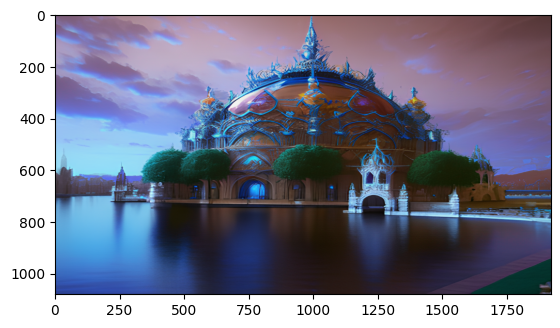

In [17]:


""" plot_image(img_hq, title="Original Image")
save_image(img_hq, filename="Original Image") """

plt.figure()
cv2.imwrite("./foo.jpg",img_hq)
plt.imshow(img_hq)


In [18]:
""" plot_image(fake_image, title="Super Resolution")
save_image(fake_image, filename="Super Resolution") """

' plot_image(fake_image, title="Super Resolution")\nsave_image(fake_image, filename="Super Resolution") '